In [40]:
import sys
import math
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
import collections


In [53]:
# Laplace smoothing constant
k = np.array([10**(-6), 10**(-5), 10**(-4), 0.001, 0.002, 0.005, 0.01, 0.02, 0.05])
k2 = np.linspace(0.1, 10, 100)
k = np.append(k, k2)

print(np.shape(k))

accuracy = np.zeros(109)
print(np.shape(accuracy))

(109,)
(109,)


In [18]:
# convert input txt into an 140000 * 28 array
def inputDigit(name="digitdata/trainingimages"):
    with open(name) as digitTxt:
        image = [list(line)[0:28] for line in digitTxt]
        rows = len(image)
    return image

In [19]:
def readRough(name="digitdata/traininglabels"):
    with open(name) as label:
        labels = []
        for line in label:
            labels.append(line[0])
    return labels


In [20]:
digitImage = inputDigit()
#print(len(digitImage))
#print(len(digitImage[139999]))

In [21]:
label = readRough()
print (len(label))
class_ = sorted(collections.Counter(label).items())
with open('labelstats.txt', 'wb') as fp:
    pickle.dump(class_, fp)

5000


In [22]:
testlabels = readRough("digitdata/testlabels")
testclass_ = sorted(collections.Counter(testlabels).items())
def confusion_matrix():
    conf_matrix = np.zeros(shape=(10,10))
    for i in range(1000):
        conf_matrix[int(testlabels[i])][int(answer[i])] += 1
            
    for i in range(10):
        for j in range(10):
            conf_matrix[i][j] /= testclass_[i][1]
    
    return conf_matrix

In [58]:
for k_index in range(109):
    # load the number of each digit in the training set
    with open ('labelstats.txt', 'rb') as fp:
        class_ = pickle.load(fp)

    # Training
    # P(Fij = 1 | class) = (# of times pixel (i,j) has value 1 in training examples from this class) / (Total # of training examples from this class)
    # P(Fij = 0 | class) = (# of times pixel (i,j) has value 0 in training examples from this class) / (Total # of training examples from this class)
    digitImage = inputDigit()
    training0=np.zeros(shape=(10, 28, 28))
    training1=np.zeros(shape=(10, 28, 28))

    count = 0
    for i in range(5000):
        for row in range(28):
            for col in range(28):
                if digitImage[i*28 + row][col] == ' ':
                    training1[int(label[i])][row][col] += 0
                    training0[int(label[i])][row][col] += 1
                else:
                    training1[int(label[i])][row][col] += 1
                    training0[int(label[i])][row][col] += 0

    for i in range(10):
        training1[i] = (training1[i] + k[k_index]) / (class_[i][1] + k[k_index] * 2)
        training0[i] = (training0[i] + k[k_index]) / (class_[i][1] + k[k_index] * 2)

    # MAP classification
    # posterior probability = log P(class) + log P(f1,1 | class) + log P(f1,2 | class) + ... + log P(f28,28 | class)

    test_rough = inputDigit(name = "digitdata/testimages")
    answer = np.zeros(1000)

    for i in range(1000):
        test_image = np.zeros(shape=(28,28))
        for row in range(28):
            for col in range(28):
                if test_rough[i*28+row][col] == ' ':
                    test_image[row][col] = 0
                else:
                    test_image[row][col] = 1

        posteriori = np.zeros(10)
        for class_num in range(10):
            posteriori[class_num] = math.log(class_[class_num][1])
            for row in range(28):
                for col in range(28):
                    if test_image[row][col] == 0:
                        posteriori[class_num] += math.log(training0[class_num][row][col])
                    else:
                        posteriori[class_num] += math.log(training1[class_num][row][col] )   
        answer[i] = np.argmax(posteriori)
        #print(posteriori)

    #print(answer)


    # print confusion matrix
    conf_matrix = confusion_matrix()
    conf_matrix = np.around(conf_matrix, 2)
    for row in conf_matrix:
        print(row)
    overall_accuracy = 0
    for i in range(10):
        overall_accuracy += conf_matrix[i][i] * testclass_[i][1]
    accuracy[k_index] = overall_accuracy
    print("overall_accuracy(k=" + str(k[k_index]) + ") = " + str(overall_accuracy/1000))

[ 0.84  0.    0.01  0.    0.01  0.06  0.03  0.    0.04  0.  ]
[ 0.    0.96  0.01  0.    0.    0.02  0.01  0.    0.    0.  ]
[ 0.01  0.03  0.8   0.04  0.02  0.    0.06  0.01  0.04  0.  ]
[ 0.    0.01  0.    0.8   0.    0.03  0.02  0.07  0.01  0.06]
[ 0.    0.    0.01  0.    0.75  0.01  0.04  0.01  0.02  0.17]
[ 0.02  0.01  0.01  0.13  0.03  0.68  0.01  0.01  0.02  0.07]
[ 0.01  0.03  0.05  0.    0.03  0.07  0.78  0.    0.02  0.  ]
[ 0.    0.05  0.04  0.    0.03  0.    0.    0.73  0.03  0.13]
[ 0.01  0.01  0.03  0.14  0.03  0.08  0.    0.01  0.6   0.1 ]
[ 0.01  0.01  0.    0.03  0.09  0.02  0.    0.02  0.01  0.81]
overall_accuracy(k=1e-06) = 0.77565
[ 0.84  0.    0.01  0.    0.01  0.06  0.03  0.    0.04  0.  ]
[ 0.    0.96  0.01  0.    0.    0.02  0.01  0.    0.    0.  ]
[ 0.01  0.03  0.8   0.04  0.02  0.    0.06  0.01  0.04  0.  ]
[ 0.    0.01  0.    0.8   0.    0.03  0.02  0.07  0.01  0.06]
[ 0.    0.    0.01  0.    0.75  0.01  0.04  0.01  0.02  0.17]
[ 0.02  0.01  0.01  0.13  0.03  0.

In [60]:
with open('k_accuracy.txt', 'wb') as fp:
    pickle.dump(accuracy, fp)

In [61]:
with open ('k_accuracy.txt', 'rb') as fp:
    accuracy2 = pickle.load(fp)

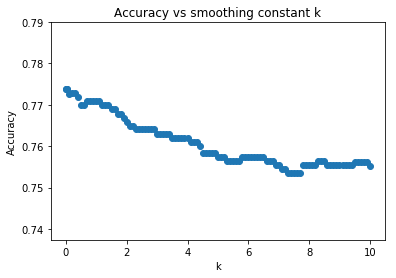

In [70]:
%matplotlib inline
plt.figure()
ax = plt.gca()
#ax.set_xscale('log')
plt.scatter(k[5:], accuracy2[5:]/1000, label = 'f(x)')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs smoothing constant k")